# Mini project 5
#### Тестовое VK

### Tasks

1. Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

2. Нарисуйте график распределения показов на объявление за весь период.

3. А теперь давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

4. Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 

5. *Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 

6. *Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

7. *Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых.

       (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

9. *Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).

       Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

11. *А теперь давайте выведем на интерактивный график эти категории с количеством уникальных клиентов в них.


### METADATA
В этот раз у нас ядрёный датасэт о рекламах

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. 

    ads_data.csv – данные взаимодействий с рекламными объявлениями
    date – дата
    time – время
    event – действие (просмотр/клик)
    platform – платформа
    ad_id – id объявления
    client_union_id – id рекламного кабинета
    campaign_union_id – id рекламной кампании
    ad_cost_type – тип оплаты
    ad_cost – цена
    has_video – есть ли видео
    target_audience_count – размер аудитории

И таблица с характеристиками рекламных клиентов (те, кто разместил эти объявления).

    ads_clients_data.csv – характеристики рекламных клиентов
    date – дата
    client_union_id – id рекламного кабинета
    community_id – id сообщества
    create_date – дата создания рекламного клиента


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline

import plotly.express as px

import zipfile

In [2]:
# настройка отображения графиков в seaborn по умолчанию:
sns.set(
        font_scale = 2,                            # размер шрифта
        style      = "whitegrid",                  # общий вид графика: "whitegrid" - белый фон с линиями 
        rc         = {'figure.figsize':(20,7)}     # размерность отображения графика
        )

In [3]:
zf          = zipfile.ZipFile('C://Users/user/Karpov_courses/Mini_projects/Mini_pj_3/ads.zip')
ads_data    = pd.read_csv(zf.open('ads_data.csv'))
ads_client  = pd.read_csv(zf.open('ads_clients_data.csv'))

FileNotFoundError: [Errno 2] No such file or directory: 'C://Users/user/Karpov_courses/Mini_projects/Mini_pj_5/ads.zip'

In [12]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [131]:
print(f'Количество дубликатов в ads_data = {ads_data.duplicated().sum()} строк.')

Количество дубликатов в ads_data = 682670 строк.


In [132]:
ads_data.drop_duplicates(inplace= True)
# очистка от дубликатов

In [157]:
ads_client.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [133]:
print(f'Количество дубликатов в ads_client = {ads_client.duplicated().sum()} строк.')

Количество дубликатов в ads_client = 0 строк.


In [162]:
ads_client['community_id'] = ads_client.community_id*-1
ads_client.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,130371893,2018-12-24
1,2020-05-07,2,130304626,2019-02-10
2,2020-05-07,3,130462599,2019-01-25
3,2020-05-07,4,130574300,2018-12-09
4,2020-05-07,5,130292358,2019-01-08


1. Разберемся с распределением количества показов и кликов.

       Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [16]:
ads_data.event.value_counts()

event
view     298749
click     18581
Name: count, dtype: int64

In [166]:
number_per_ad_per_event = ads_data\
                            .groupby(['ad_id','event'], as_index= False)\
                            .agg({'time':'count'})\
                            .rename(columns= {'time':'event_number'})
number_per_ad_per_event

,ad_id,event,event_number
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [172]:
pivot_per_ad_events = number_per_ad_per_event.pivot(index   = 'ad_id', 
                                                    columns = 'event', 
                                                    values  = 'event_number')\
                                             .fillna(0)
pivot_per_ad_events

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [174]:
pivot_per_ad_events.mean().round()

event
click    113.0
view     923.0
dtype: float64

In [181]:
# Вариант 2

number_per_ad_per_event = ads_data\
                            .groupby(['ad_id','event'], as_index= False)\
                            .agg({'time':'count'})\
                            .rename(columns= {'time':'event_number'})

mean_click_and_view = number_per_ad_per_event\
                                .groupby('event')\
                                .agg({'event_number': 'sum'})\
                                .div(ads_data.ad_id.nunique())\
                                .round()
mean_click_and_view

,event_number
event,
click,113.0
view,923.0


#### 2. Нарисуйте график распределения показов на объявление за весь период.

In [198]:
views_per_ad = number_per_ad_per_event[number_per_ad_per_event.event == "view"]


C:\Users\user\AppData\Local\Temp\ipykernel_8312\2195008653.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='event_number', ylabel='Density'>

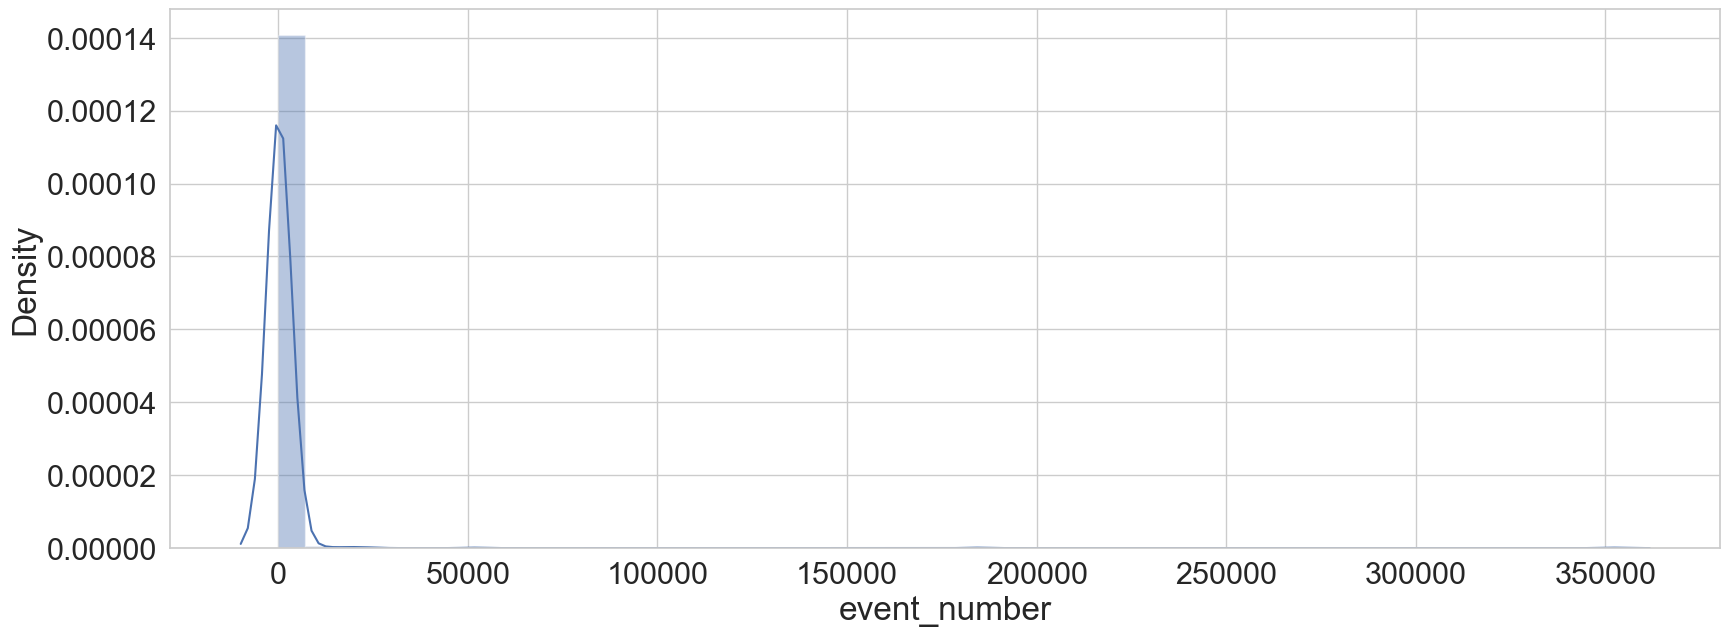

In [200]:
sns.distplot(views_per_ad.event_number)

In [213]:
# лагорифмирование значений, для нелинейного сжатия, при этом получается визуально-удоворимого вида данные с читабельным распределением
views_per_ad['log_views'] = np.log(views_per_ad.event_number)

C:\Users\user\AppData\Local\Temp\ipykernel_8312\60008387.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\user\AppData\Local\Temp\ipykernel_8312\46200120.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




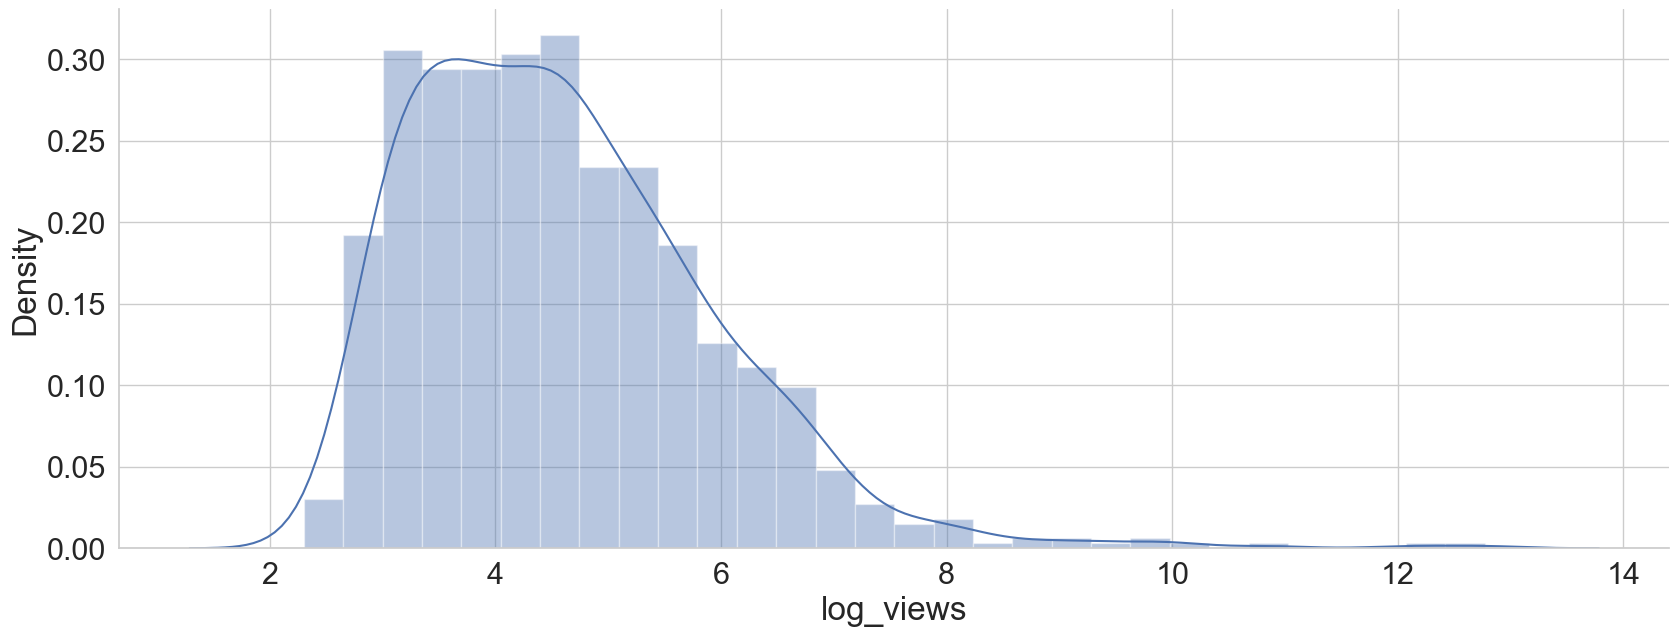

In [212]:
sns.distplot(views_per_ad.log_views)
sns.despine()

#### 3. А теперь давайте посчитаем скользящее среднее показов с окном 2.

        Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

In [247]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [254]:
ads_view_per_date = ads_data\
                        .query(' event == "view" ')\
                        .pivot_table(index   = 'ad_id', 
                                     columns = 'date', 
                                     values  = 'time',
                                     aggfunc = 'count'
                                    )
ads_view_per_date.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [262]:
mean_views = ads_view_per_date.mean().round()
mean_views

date
2019-04-01    154.0
2019-04-02    138.0
2019-04-03    164.0
2019-04-04    676.0
2019-04-05    919.0
2019-04-06    277.0
dtype: float64

In [268]:
rolling_views = mean_views.rolling(2, min_periods= 1).mean().round()
rolling_views

date
2019-04-01    154.0
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [269]:
rolling_views['2019-04-06']

598.0

#### 4. Скользящее среднее часто используется для поиска аномалий в данных. 

Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем.

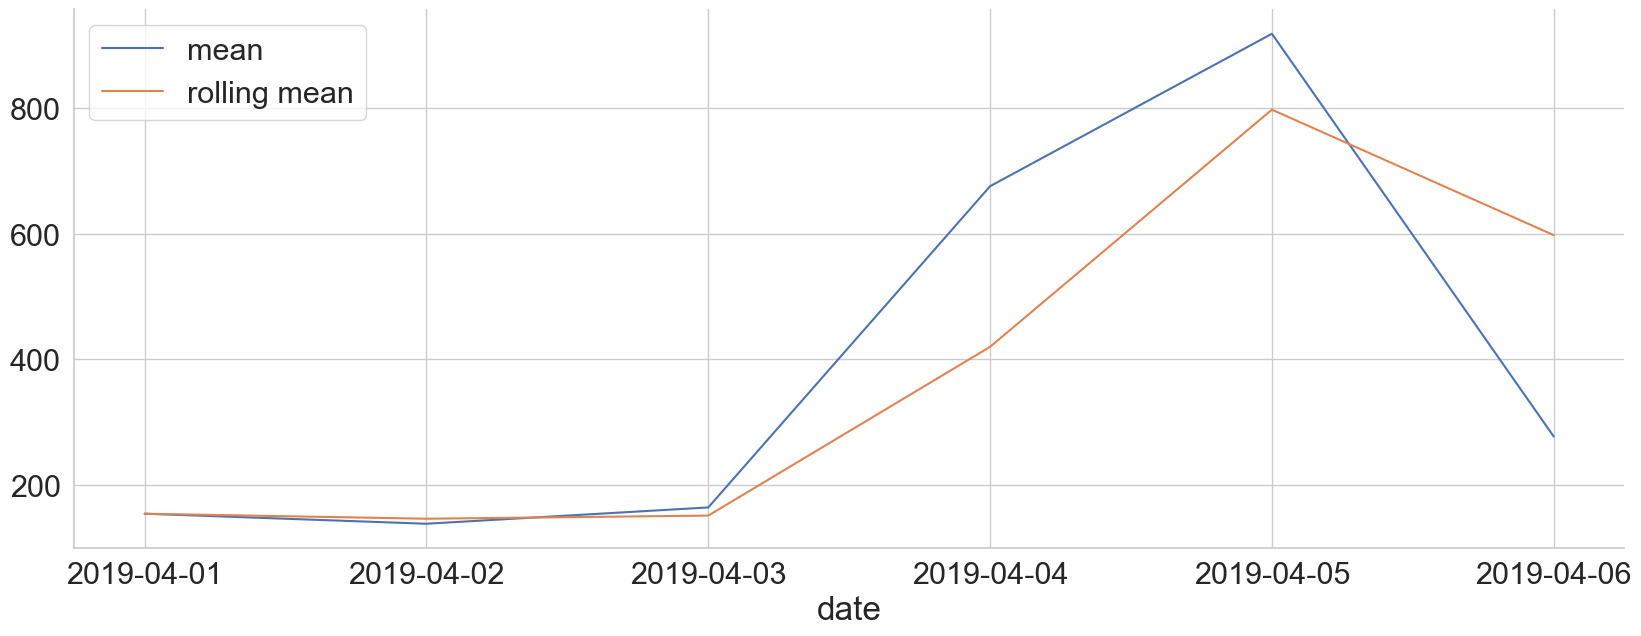

In [289]:
sns.lineplot(mean_views, label = 'mean')
sns.lineplot(rolling_views, label = 'rolling mean')
# plt.legend()   - отобразить легенду
sns.despine()

In [274]:
abs(mean_views['2019-04-04'] - rolling_views['2019-04-04'])

256.0

In [273]:
abs(mean_views['2019-04-06'] - rolling_views['2019-04-06'])

321.0

In [296]:
mean_views.subtract(rolling_views) \
            .abs() \
            .max()

321.0

In [297]:
mean_views.subtract(rolling_views) \
            .abs() \
            .idxmax()

'2019-04-06'

#### 5. *Напишите функцию, 
которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия.

In [294]:
mean_views.subtract(rolling_views) \
            .abs()\
            .idxmax()

'2019-04-06'

In [313]:
def find_anomaly_ad(ad_view_per_day_per_add):
   
    # find anomaly day
    # avarage for each date
    mean_views = ad_view_per_day_per_add.mean()

    # find date whith anomaly, requre  mean_views
    mean_difference = mean_views.subtract(rolling_views)
    anomaly_day = mean_difference\
                        .abs()\
                        .idxmax()
    # find sign
    difference_value = mean_difference[anomaly_day] 
    
    # finde max view ad
    if difference_value <= 0:
        anomaly_ad = ad_view_per_day_per_add[anomaly_day].idxmax()
    
    # finde minimum view ad
    else: 
       anomaly_ad = ad_view_per_day_per_add[anomaly_day].idxmin()

    return anomaly_ad

In [312]:
find_anomaly_ad(ads_view_per_date)

112583

#### 6 *Теперь подгрузим данные по рекламным клиентам
и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [314]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [371]:
ads_data['date'] = pd.to_datetime(ads_data.date)
ads_data['time'] = pd.to_datetime(ads_data.time)
ads_data.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [315]:
ads_client.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,130371893,2018-12-24
1,2020-05-07,2,130304626,2019-02-10
2,2020-05-07,3,130462599,2019-01-25
3,2020-05-07,4,130574300,2018-12-09
4,2020-05-07,5,130292358,2019-01-08


In [370]:
ads_client['date']        = pd.to_datetime(ads_client.date)
ads_client['create_date'] = pd.to_datetime(ads_client.create_date)
ads_client.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [351]:
ads_full_data = ads_data.merge(ads_client.drop(columns= ['date', 'community_id']))
ads_full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2018-12-25
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2018-11-13
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2018-08-18
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2019-02-22


In [374]:
ads_full_data[['date','create_date']] = ads_full_data[['date','create_date']].apply(pd.to_datetime)
ads_full_data.dtypes

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
create_date              datetime64[ns]
dtype: object

In [379]:
ads_full_data\
            .groupby(['client_union_id'])\
            .apply(lambda group: (group.date - group.create_date).min())\
            .mean()

C:\Users\user\AppData\Local\Temp\ipykernel_8312\1152451470.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Timedelta('124 days 09:04:43.532219570')

#### 7. *Вычислите конверсию 
из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых.

In [380]:
ads_full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2018-12-25
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2018-11-13
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2018-08-18
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2019-02-22


In [392]:
# threshold - порог по условию: в течение не более 365 дней
threshold = pd.to_timedelta('365d')
threshold

Timedelta('365 days 00:00:00')

In [396]:
creation_difference = ads_full_data\
                        .groupby(['client_union_id'])\
                        .apply(lambda group: (group.date - group.create_date).min())

creation_difference = creation_difference.loc[creation_difference.values < threshold]

C:\Users\user\AppData\Local\Temp\ipykernel_8312\3379045358.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [400]:
round(creation_difference.shape[0]/ads_client.client_union_id.nunique() * 100, 2)

0.69

#### 8*.
*Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).

    Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [444]:
creation_difference = ads_full_data\
                        .groupby(['client_union_id'])\
                        .apply(lambda group: (group.date - group.create_date).min())

creation_difference = creation_difference.to_frame('days_to_active')

#  создание интервалов 
bins = pd.to_timedelta(['0', '30d', '90d', '180d', '365d'])

creation_difference['days_to_active_categorical'] = pd.cut(creation_difference.days_to_active,
                                                               bins   = bins,
                                                               labels = ['0-30', '30-90', '90-180', '180-365']  
                                                            )          
creation_difference

C:\Users\user\AppData\Local\Temp\ipykernel_8312\1785567393.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,days_to_active,days_to_active_categorical
client_union_id,,
1,98 days,90-180
9,114 days,90-180
13,66 days,30-90
16,105 days,90-180
20,32 days,30-90
...,...,...
122004,67 days,30-90
122013,151 days,90-180
122023,126 days,90-180


In [451]:
creation_difference[creation_difference.days_to_active_categorical == '0-30']

,days_to_active,days_to_active_categorical
client_union_id,,
2137,29 days,0-30
14606,29 days,0-30
21194,28 days,0-30
24853,28 days,0-30
27420,29 days,0-30
38094,28 days,0-30
98415,29 days,0-30
108678,26 days,0-30
110442,29 days,0-30


#### 9*
*А теперь давайте выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [456]:
clients_per_active_days = creation_difference.drop(columns='days_to_active')
clients_per_active_days

,days_to_active_categorical
client_union_id,
1,90-180
9,90-180
13,30-90
16,90-180
20,30-90
...,...
122004,30-90
122013,90-180
122023,90-180


In [457]:
clients_per_active_days.days_to_active_categorical.value_counts()

days_to_active_categorical
90-180     396
30-90      263
180-365    168
0-30        11
Name: count, dtype: int64

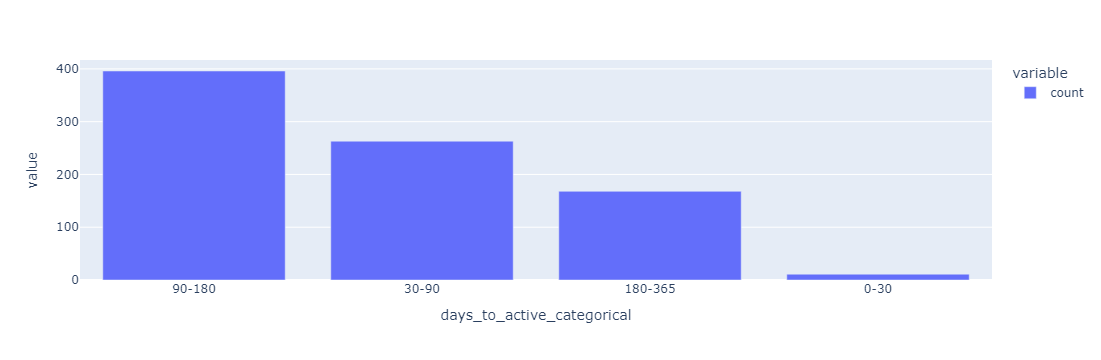

In [458]:
# Интерактивный график из библиотеки Plotly

fig = px.bar(clients_per_active_days.days_to_active_categorical.value_counts())
fig.show()